In [86]:
import matplotlib.pyplot as plt
import glob,re
import numpy as np

In [104]:
class MemoryLeaks:

    leaksTypes = ["definitely lost:", "indirectly lost:", "possibly lost:"]
    filesName = []
    
    def findAllFiles(self, loc):
        '''
            This function returns the list of all 
            files found at the location loc, e.g 
            location "C:\\Users\\H299664\\Desktop\\plot\\*.log"
        '''
        
        files = glob.glob(loc)
        print("found files : ", files)
        
        if len(files) is 0:
            print('no file found! Please enter the correct module name')
            
        return files
    
    def listLeaks(self, files):
        leakslist = []
        for file in files:
            # to get the all type of losses from one file
            templist = []
            f = open(file,'r')
            # regex to get name from the file 
            fileName = re.search(r'([0-9]+-){5}[0-9]+', file)
            filesName.append(fileName.group())
            for line in f:
                if leaksTypes[0] in line:
                    temp = line.split(" ")
                    templist = [temp[-5]]
                elif leaksTypes[1] in line:
                    temp = line.split(" ")
                    templist.append(temp[-5])
                elif leaksTypes[2] in line:
                    temp = line.split(" ")
                    templist.append(temp[-5])
            f.close()
            leakslist.append(templist)
        return leakslist

    def printDict():
        for x in dictFile:
            print(x)
            for i in dictFile[x]:
                print(i)

# Module?
module = input()
# instantiating MemoryLeak class
mLeak = MemoryLeaks()
# location of files
loc = "C:\\Users\\H299664\\Desktop\\plot\\valgrind_"+module+"*.log"
# all files at location
files = mLeak.findAllFiles(loc)
# list of leaks
dictLeaks = np.array(mLeak.listLeaks(files))

SyntaxError: invalid syntax (<ipython-input-104-e31c7e3da4d1>, line 17)

In [108]:
# plot the leaks
def plot_bar():
    # this is to index files increasing time order
    index = np.arange(len(dictLeaks))
    ax = plt.subplot(111)
    
    rect1 = ax.bar(index-0.2, dictLeaks[:,0], width=0.2, color='b', align='center')
    rect2 = ax.bar(index, dictLeaks[:,1], width=0.2, color='g', align='center')
    rect3 = ax.bar(index+0.2, dictLeaks[:,2], width=0.2, color='r', align='center')
    ax.legend( (rect1[0], rect2[0], rect3[0]), (leaksTypes[0], leaksTypes[1], leaksTypes[2]) )
    
    plt.xlabel('date and time -----------> ')
    plt.ylabel('leaks ( bytes ) ----------->')
    plt.xticks(index, filesName, fontsize=5, rotation=30)
    plt.title("Memory leaks for "+ module)
    plt.show()

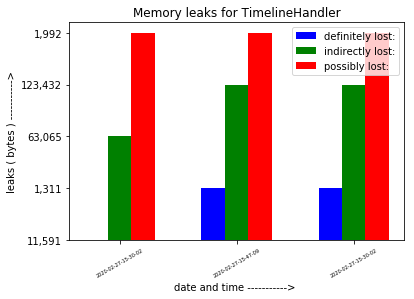

In [109]:
plot_bar()
# help(plt.subplot)